/tmp/ipykernel_8558/1111784718.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")


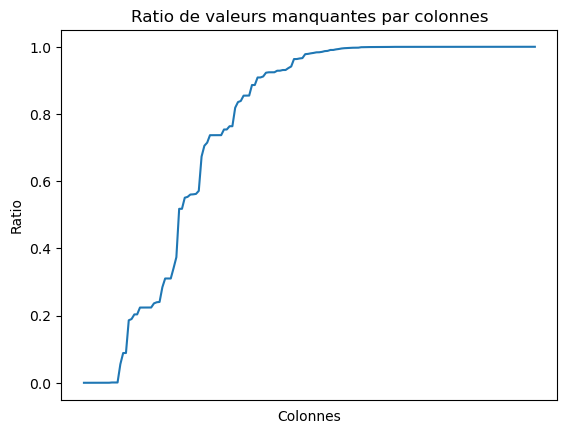

Sur tout le dataset, on a un taux de valeurs manquantes qui équivaut à 76.22 %.
Sur 162 colonnes, il y en a 16 qui n'ont aucune valeurs
Les colonnes qui n'ont aucune valeurs sont les suivantes :
['no_nutriments' 'ingredients_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil' 'nutrition_grade_uk'
 'butyric-acid_100g' 'caproic-acid_100g' 'lignoceric-acid_100g'
 'cerotic-acid_100g' 'melissic-acid_100g' 'elaidic-acid_100g'
 'mead-acid_100g' 'erucic-acid_100g' 'nervonic-acid_100g'
 'chlorophyl_100g' 'glycemic-index_100g' 'water-hardness_100g']
Après conservation des données utiles au projet, il n'y a plus que 41.74 % de valeurs manquantes.
Il y a 38739 generic_names sur 320773 qui sont considérés comme valide, soit 12.08 %
Il y a 83 lignes pour lesquelles il existe un generic_name valide mais pas de product_name valide


/home/alan/miniconda3/envs/oc/lib/python3.10/site-packages/pandas/core/indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Il y a 30.96 % de valeurs de nutri-score non définies
Il y a 92.09 % de valeurs définies pour fat_100g
Avec valeurs abbérantes


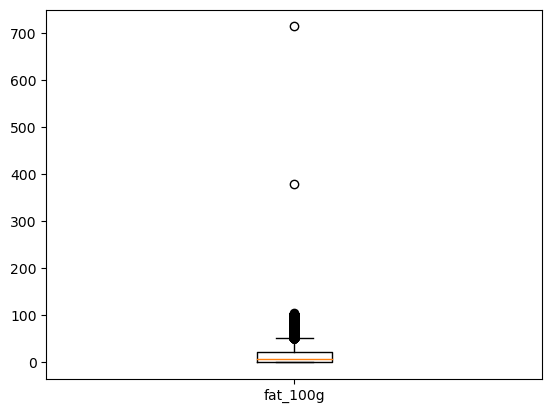

Sans valeurs abbérantes


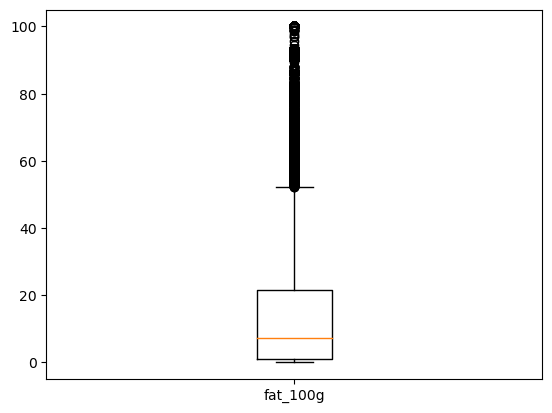

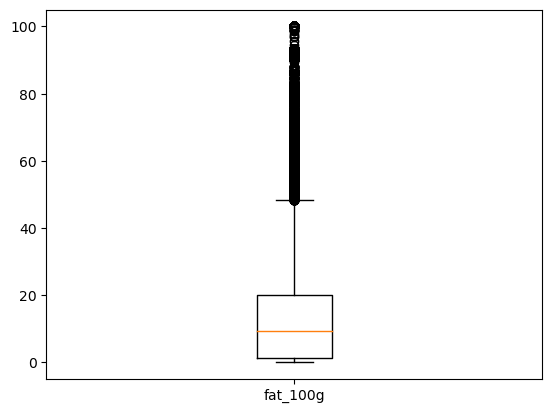

On peut vérifier qu'on a bien aucune valeur null
Il y a 100.0 % de valeurs définies pour fat_100g
Sans valeurs abbérantes


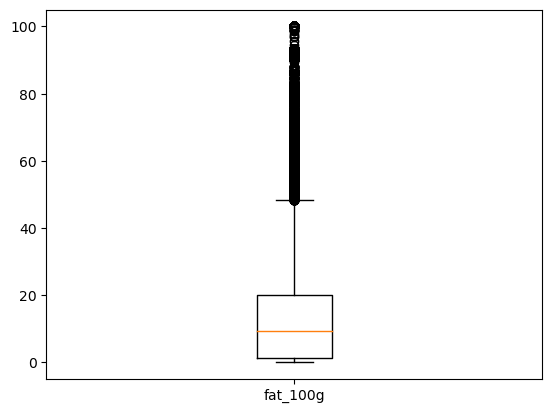

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition, preprocessing

pd.options.display.float_format = '{:.2f}'.format

%run ./nettoyage.ipynb

In [25]:
# Permet de dire que la variable `data` est du type `pd.DataFrame`
data:pd.DataFrame

# Univariée

In [26]:
data.describe()

,nutri_score_int,additives_n,fat_100g,saturated-fat_100g,energy_100g
count,221067.00,196071.00,221067.00,220876.00,220876.00
mean,9.17,1.98,13.36,4.97,1196.36
std,9.06,2.53,15.46,7.66,6991.84
min,-15.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,1.17,0.00,452.00
50%,10.00,1.00,9.21,1.79,1196.00
75%,16.00,3.00,20.00,7.14,1715.00
max,40.00,31.00,100.00,550.00,3251373.00


In [27]:
# On split et étend nos lignes pour qu'un pays soit lié avec sa ligne
data.loc[:,"countries"] = data['countries'].str.split(',')
data = data.explode("countries")

In [28]:
# Après augmentation de lignes
data.describe()

,nutri_score_int,additives_n,fat_100g,saturated-fat_100g,energy_100g
count,225495.00,199848.00,225495.00,225288.00,225288.00
mean,9.20,1.98,13.39,5.00,1198.18
std,9.07,2.52,15.47,7.68,6923.98
min,-15.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,1.18,0.00,452.00
50%,10.00,1.00,9.23,1.79,1197.00
75%,16.00,3.00,20.30,7.14,1724.00
max,40.00,31.00,100.00,550.00,3251373.00


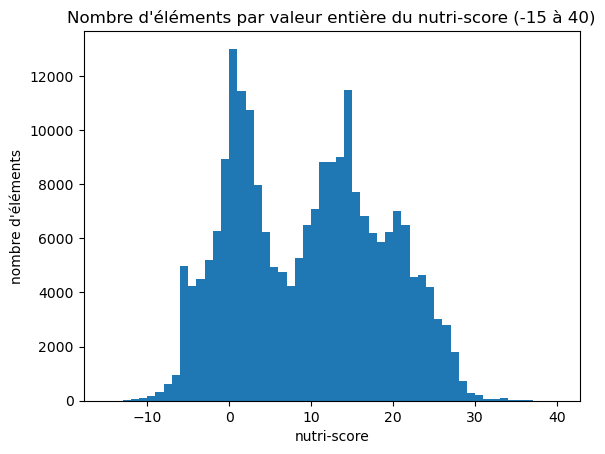

In [29]:
plt.title("Nombre d'éléments par valeur entière du nutri-score (-15 à 40)")

plt.xlabel("nutri-score")
plt.ylabel("nombre d'éléments")

plt.hist(x=data["nutri_score_int"], bins=range(-15, 41))

plt.show()

On remarque que la majorité des données du nutri-score sont soit proche de 0 ou de 15 d'après les 2 pics visibles.
En effet il y a une forme de bosses de chameau. Les autres données sont réparties autour des 2 bosses.

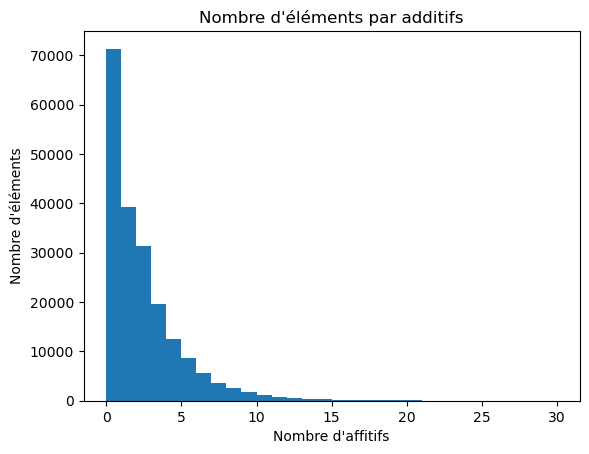

In [30]:
plt.title("Nombre d'éléments par additifs")

plt.xlabel("Nombre d'affitifs")
plt.ylabel("Nombre d'éléments")

xMin = int(min(data["additives_n"]))
xMax = int(max(data["additives_n"]))

plt.hist(x=data["additives_n"], bins=range(xMin, xMax))

plt.show()


La majorité des produits ne contiennent pas d'additifs. Il semblerait qu'à partir du nombre d'affitifs on puisse retrouver à peu près combien d'éléments avec le même nombre d'additifs existent.
Cela peut sûrement se calculer avec une fonction quadratique ou 1/x par exemple.

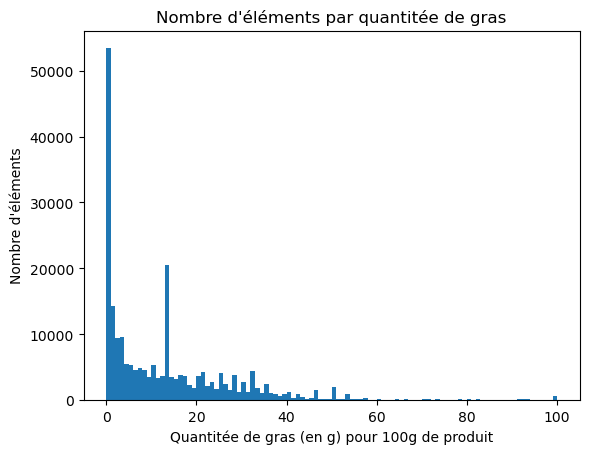

In [67]:
plt.title("Nombre d'éléments par quantitée de gras")

plt.xlabel("Quantitée de gras (en g) pour 100g de produit")
plt.ylabel("Nombre d'éléments")


plt.hist(x=data["fat_100g"], bins=range(0, 101))

plt.show()

Aucune forme de logique sur les données pour le nombre d'éléments par quantitée de gras. On remarque simplement une grosse concentration des données entre 0 et 40, mais encore les pics vers 0g et 13g pour 100g de produit.

# Bivariée

Text(0.5, 0, 'Quantitée de gras (en g) pour 100g de produit (privé de 0)')

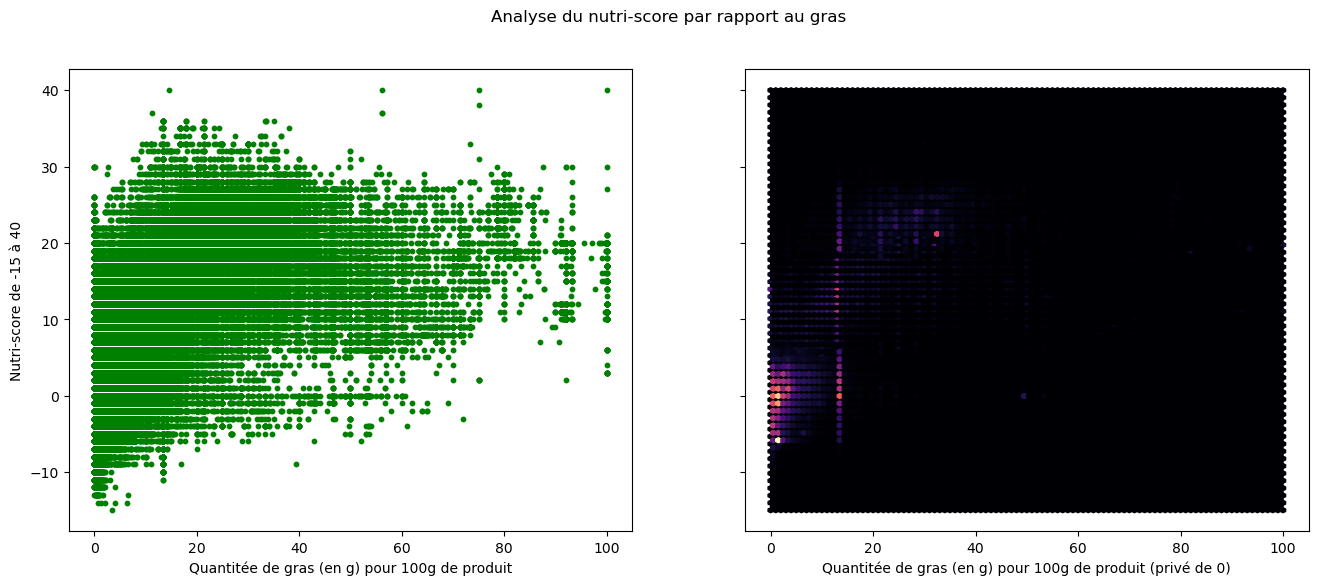

In [32]:

xLabel = "Quantitée de gras (en g) pour 100g de produit"
yLabel = "Nutri-score de -15 à 40"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), sharey=True)

fig.suptitle("Analyse du nutri-score par rapport aux gras")

# On exclu 0 car les beaucoup d'éléments ont 0
ax1.scatter(x=data["fat_100g"], y=data["nutri_score_int"], c="g", s=10)
ax1.set_xlabel(xLabel)
ax1.set_ylabel(yLabel)

without_fat_0 = data.loc[data["fat_100g"].ne(0)]

ax2.hexbin(x=without_fat_0["fat_100g"], y=without_fat_0["nutri_score_int"], cmap="magma")
ax2.set_xlabel(f"{xLabel} (privé de 0)")

In [33]:
numerics = data.select_dtypes(include=np.number)
correlations = numerics.corr(method='pearson').round(2)
correlations

,nutri_score_int,additives_n,fat_100g,saturated-fat_100g,energy_100g
nutri_score_int,1.00,0.17,0.55,0.63,0.07
additives_n,0.17,1.00,-0.09,-0.04,-0.00
fat_100g,0.55,-0.09,1.00,0.66,0.08
saturated-fat_100g,0.63,-0.04,0.66,1.00,0.07
energy_100g,0.07,-0.00,0.08,0.07,1.00


<AxesSubplot:>

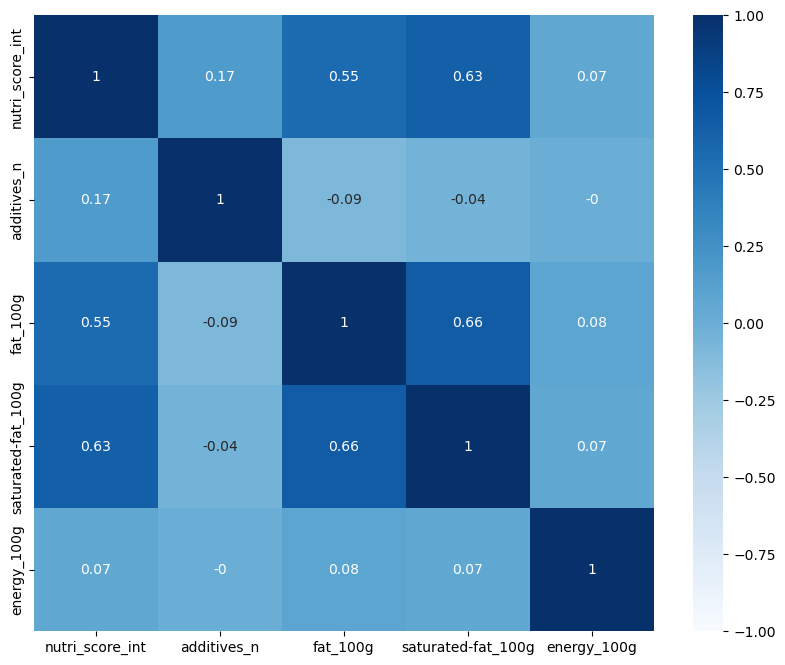

In [34]:

cols = len(numerics.columns)
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(correlations, annot=True, cmap="Blues", vmin=-1, vmax=1)

In [35]:
numerics.replace(np.NaN, 0, inplace=True)

# ACP

In [36]:
numerics.columns

Index(['nutri_score_int', 'additives_n', 'fat_100g', 'saturated-fat_100g',
       'energy_100g'],
      dtype='object')

In [65]:
n = len(numerics.columns) - 1
X_scaled = preprocessing.StandardScaler().fit_transform(numerics)
pca = decomposition.PCA(n_components=n)
X_projected = pca.fit_transform(X_scaled)
pcs = pd.DataFrame(X_projected, index=numerics.index, columns=["F"+str(i+1) for i in range(n)])
pcs

,F1,F2,F3,F4
0,2.69,0.93,-0.18,-0.09
1,-0.78,0.92,0.16,-0.69
2,1.83,1.06,-0.01,-1.50
3,0.05,0.02,0.09,-0.43
4,1.04,0.46,0.04,-0.72
...,...,...,...,...
221062,-1.51,0.76,0.16,0.01
221063,-1.54,0.87,0.19,-0.34
221064,-0.65,0.91,0.21,-0.50
221065,-1.32,0.68,-0.07,0.22


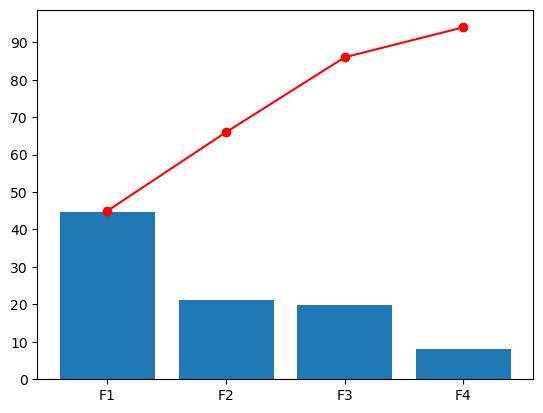

In [38]:
scree = (pca.explained_variance_ratio_ * 100).round(2)
scree_cum = scree.cumsum().round()

n_list = range(1,n+1)

plt.xticks(ticks=n_list, labels=map(lambda x: f"F{x}" ,n_list))
plt.yticks(ticks=range(0, 100, 10))
plt.bar(n_list, scree)
plt.plot(n_list, scree_cum, c="r", marker="o")

plt.show()

In [45]:
# Fonction copiée du cours P2C6-TP-cours-effectuees
def pca_circle(pca,x,y):
    fig, ax = plt.subplots(figsize=(9, 8))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0,
                0,  # Start the arrow at the origin
                pca.components_[0, i],  #0 for PC1
                pca.components_[1, i],  #1 for PC2
                head_width=0.05,
                head_length=0.03, 
                width=0.02)

        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                numerics.columns[i])

    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], c='r')
    plt.plot([0, 0], [-1, 1], c='r')


    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel(f'F{x+1} ({round(100*pca.explained_variance_ratio_[x],1)}%)')
    plt.ylabel(f'F{y+1} ({round(100*pca.explained_variance_ratio_[y],1)}%)')

    plt.title(f"Cercle des corrélations (F{x+1} et F{y+1})")
    plt.grid(True)


    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    # Repère orthonormé
    plt.axis('equal')
    plt.show()

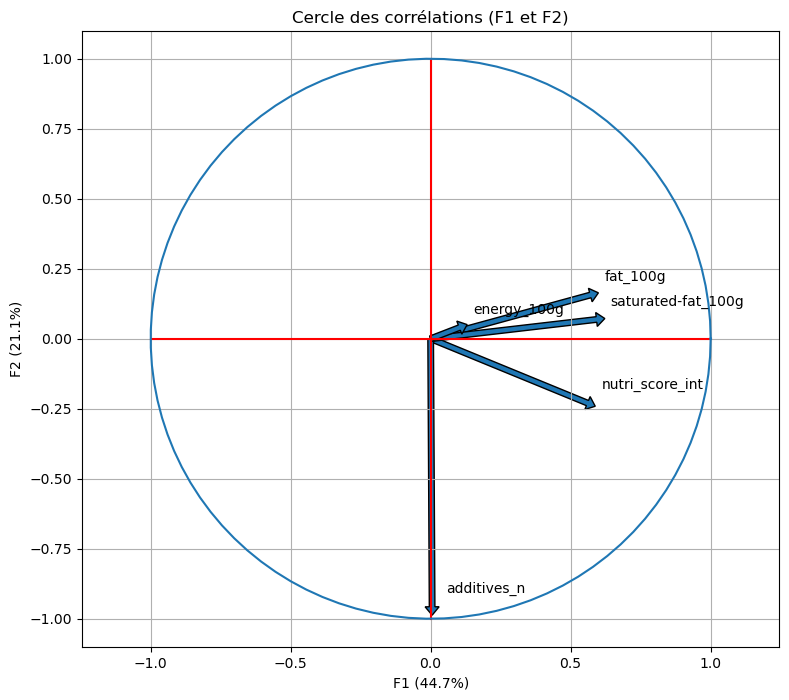

In [46]:
x, y = 0,1

pca_circle(pca, x, y)

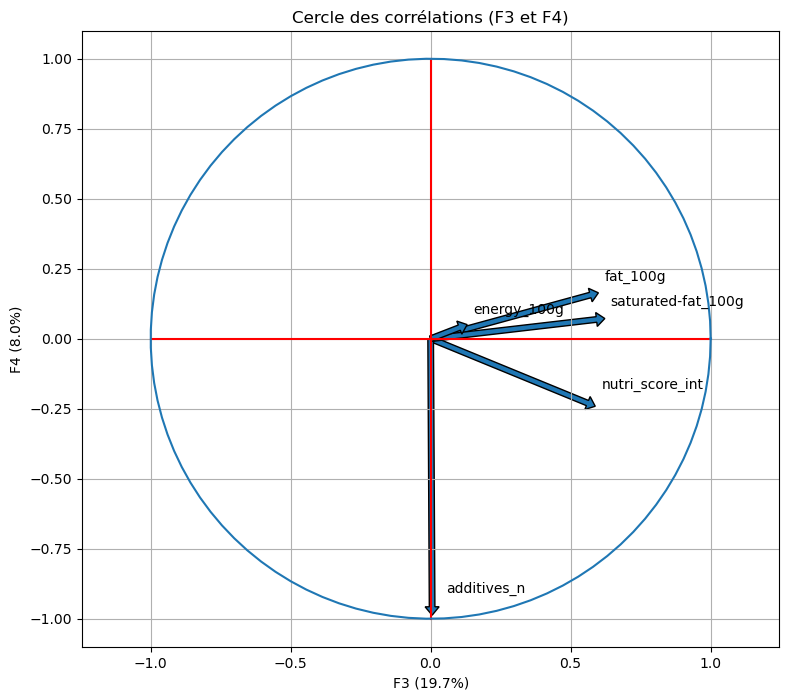

In [48]:
x,y=2,3
pca_circle(pca, x, y)

# By country

In [41]:
nutrition_by_country = data.groupby("countries")["nutri_score_int"].mean().sort_values()
nutrition_by_country

countries
Vanuatu           -0.50
Oman               0.00
Gabon              0.00
Guyana             1.00
Costa-Rica         1.00
                   ... 
Bulgarie          20.40
Egypte            20.50
Arabie Saoudite   21.83
Arménie           22.00
Pakistan          33.00
Name: nutri_score_int, Length: 94, dtype: float64

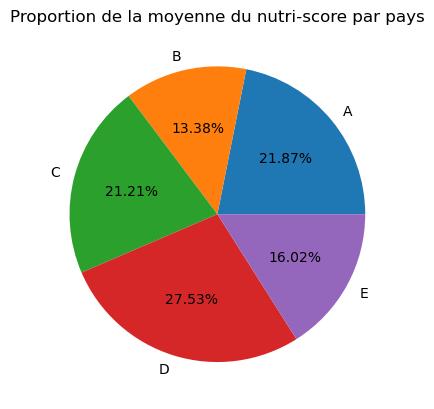

In [42]:
nutri = data["nutri_score"].value_counts().sort_index()
plt.title("Proportion de la moyenne du nutri-score par pays")
plt.pie(nutri, labels=nutri.index, autopct='%.2f%%');